# 1. Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd 

import os
import math
import pickle

from itertools import product
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb



In [2]:
DATA = 'competitive-data-science-predict-future-sales/'

train_df = pd.read_csv(DATA + 'sales_train.csv')
test_df = pd.read_csv(DATA + 'test.csv')

In [3]:
print (train_df.shape)

train_df.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
print (test_df.shape)

test_df.head()

(214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
train_df[['shop_id', 'item_id']].nunique()

shop_id       60
item_id    21807
dtype: int64

In [6]:
train_df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

<AxesSubplot:xlabel='date_block_num'>

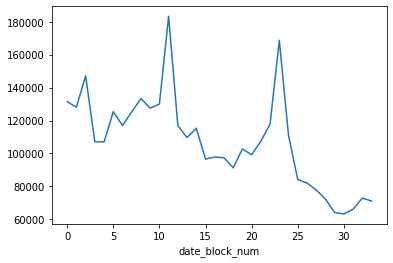

In [7]:
sale_by_month = train_df.groupby('date_block_num')['item_cnt_day'].sum()
sale_by_month.plot()

In [8]:
train_df.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [9]:
items_df = pd.read_csv(DATA + 'items.csv')

print (items_df.shape)

items_df.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
item_cats_df = pd.read_csv(DATA + 'item_categories.csv')

print (item_cats_df.shape)

item_cats_df.head()

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [11]:
shops_df = pd.read_csv(DATA + 'shops.csv')

print (shops_df.shape)

shops_df.head(60)

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


# 2. Preprocessing and feature engineering

Several shops are duplicates of each other (according to its name). Fix train and test set.

In [12]:
# Якутск Орджоникидзе, 56
train_df.loc[train_df.shop_id == 0, 'shop_id'] = 57
test_df.loc[test_df.shop_id == 0, 'shop_id'] = 57

# Якутск ТЦ "Центральный"
train_df.loc[train_df.shop_id == 1, 'shop_id'] = 58
test_df.loc[test_df.shop_id == 1, 'shop_id'] = 58

# Жуковский ул. Чкалова 39м²
train_df.loc[train_df.shop_id == 10, 'shop_id'] = 11
test_df.loc[test_df.shop_id == 10, 'shop_id'] = 11

In [13]:
train_df[['shop_id', 'item_id']].nunique()

shop_id       57
item_id    21807
dtype: int64

In [14]:
# remove first year of sales
train_df = train_df[train_df['date_block_num'] > 11]

In [15]:
# Create a grid from all shop-item combinations for every month:

date_blocks = {}

for block in train_df['date_block_num'].unique():
    d = train_df[train_df['date_block_num'] == block]
    shop_ids = sorted(d['shop_id'].unique())
    item_ids = sorted(d['item_id'].unique())
    date_blocks[block] = np.array(list(product(*[shop_ids, item_ids, [block]])), dtype='int32')

In [16]:
# Putting blocks into a single pandas DataFrame:
tuples_df = pd.DataFrame(np.vstack(date_blocks.values()), 
                         columns = ['shop_id', 'item_id', 'date_block_num'], 
                         dtype = np.int32)

<ipython-input-16-c37368edfd54>:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tuples_df = pd.DataFrame(np.vstack(date_blocks.values()),


In [17]:
# Aggregate values for (shop_id, item_id, month) tuples:

data = train_df.groupby(['shop_id', 'item_id', 'date_block_num'], as_index=False).agg({'item_cnt_day': 'sum'})
data = data.rename(columns={'item_cnt_day': 'target_value'})
data.head(10)

,shop_id,item_id,date_block_num,target_value
0,2,27,17,1.0
1,2,30,15,1.0
2,2,30,16,1.0
3,2,31,16,1.0
4,2,31,33,1.0
5,2,32,12,1.0
6,2,32,14,1.0
7,2,32,18,1.0
8,2,32,20,2.0
9,2,32,21,2.0


In [18]:
# Merge the data with tuples_df to get populated grid of data for further processing and feature generation. 
# Fill Nans with 0

train_data = pd.merge(tuples_df, data, how='left', on=['shop_id', 'item_id', 'date_block_num']).fillna(0)
train_data.head(10)

,shop_id,item_id,date_block_num,target_value
0,2,27,12,0.0
1,2,30,12,0.0
2,2,31,12,0.0
3,2,32,12,1.0
4,2,33,12,1.0
5,2,34,12,0.0
6,2,36,12,0.0
7,2,37,12,0.0
8,2,39,12,0.0
9,2,40,12,0.0


In [19]:
# Get lagged values:

lag_periods = [1, 2, 3, 6, 12]

for lag in lag_periods:
    lag_col_name = 'target_lag_' + str(lag)
    shifted = train_data[['shop_id', 'item_id', 'date_block_num'] + ['target_value']].copy()
    shifted.columns = ['shop_id', 'item_id', 'date_block_num'] + [lag_col_name]
    shifted['date_block_num'] += lag
    train_data = pd.merge(train_data, shifted, on=['shop_id', 'item_id', 'date_block_num'], how='left')
    train_data[lag_col_name].fillna(0, inplace=True)
    
train_data.head(10)

,shop_id,item_id,date_block_num,target_value,target_lag_1,target_lag_2,target_lag_3,target_lag_6,target_lag_12
0,2,27,12,0.0,0.0,0.0,0.0,0.0,0.0
1,2,30,12,0.0,0.0,0.0,0.0,0.0,0.0
2,2,31,12,0.0,0.0,0.0,0.0,0.0,0.0
3,2,32,12,1.0,0.0,0.0,0.0,0.0,0.0
4,2,33,12,1.0,0.0,0.0,0.0,0.0,0.0
5,2,34,12,0.0,0.0,0.0,0.0,0.0,0.0
6,2,36,12,0.0,0.0,0.0,0.0,0.0,0.0
7,2,37,12,0.0,0.0,0.0,0.0,0.0,0.0
8,2,39,12,0.0,0.0,0.0,0.0,0.0,0.0
9,2,40,12,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Create year and month indices

train_data['year_idx'] = train_data['date_block_num'] // 12
train_data['month_idx'] = train_data['date_block_num'] % 12 + 1
train_data.head(10)

,shop_id,item_id,date_block_num,target_value,target_lag_1,target_lag_2,target_lag_3,target_lag_6,target_lag_12,year_idx,month_idx
0,2,27,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,2,30,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,2,31,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,2,32,12,1.0,0.0,0.0,0.0,0.0,0.0,1,1
4,2,33,12,1.0,0.0,0.0,0.0,0.0,0.0,1,1
5,2,34,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1
6,2,36,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1
7,2,37,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1
8,2,39,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1
9,2,40,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [21]:
# Map days in month to create day indices

num_days = pd.Series([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
train_data['days_in_month'] = train_data['month_idx'].map(num_days)
train_data.head(10)

,shop_id,item_id,date_block_num,target_value,target_lag_1,target_lag_2,target_lag_3,target_lag_6,target_lag_12,year_idx,month_idx,days_in_month
0,2,27,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1,31
1,2,30,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1,31
2,2,31,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1,31
3,2,32,12,1.0,0.0,0.0,0.0,0.0,0.0,1,1,31
4,2,33,12,1.0,0.0,0.0,0.0,0.0,0.0,1,1,31
5,2,34,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1,31
6,2,36,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1,31
7,2,37,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1,31
8,2,39,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1,31
9,2,40,12,0.0,0.0,0.0,0.0,0.0,0.0,1,1,31


In [22]:
# add item_category_id
item_category_mapping = items_df[['item_id','item_category_id']].drop_duplicates()
train_data = pd.merge(train_data, item_category_mapping, how='left', on='item_id')

# expand mean encoding sales by item_id
cumsum = train_data.groupby('item_id')['target_value'].cumsum() - train_data['target_value']
cumcnt = train_data.groupby('item_id')['target_value'].cumcount()
train_data['item_target_enc_exp'] = cumsum / cumcnt

target_mean = train_data['target_value'].mean()
train_data['item_target_enc_exp'].fillna(target_mean, inplace=True)

In [23]:
# expand mean encoding sales by shop_id
cumsum = train_data.groupby('shop_id')['target_value'].cumsum() - train_data['target_value']
cumcnt = train_data.groupby('shop_id')['target_value'].cumcount()
train_data['shop_target_enc_exp'] = cumsum / cumcnt

target_mean = train_data['target_value'].mean()
train_data['shop_target_enc_exp'].fillna(target_mean, inplace=True)

In [24]:
# expand mean encoding sales by item_category_id
cumsum = train_data.groupby('item_category_id')['target_value'].cumsum() - train_data['target_value']
cumcnt = train_data.groupby('item_category_id')['target_value'].cumcount()
train_data['item_category_target_enc_exp'] = cumsum / cumcnt

target_mean = train_data['target_value'].mean()
train_data['item_category_target_enc_exp'].fillna(target_mean, inplace=True)

In [25]:
# add last sale for shop_id, item_id pairs
last_sale_df = []
for d in range(1, 35):
    df = train_data[train_data.date_block_num < d].groupby(['shop_id', 'item_id'], as_index=False)['date_block_num'].max()
    df['last_sale_ago'] = d - df.date_block_num
    df.date_block_num = d
    last_sale_df.append(df)
last_sale_df = pd.concat(last_sale_df)

train_data = pd.merge(train_data, last_sale_df, on=['shop_id', 'item_id', 'date_block_num'], how='left')
train_data['last_sale_ago'].fillna(0, inplace=True)

In [26]:
# add last shop sale
last_shop_sale_df = []
for d in range(1, 35):
    df = train_data[train_data.date_block_num < d].groupby('shop_id', as_index=False)['date_block_num'].max()
    df['last_shop_sale_ago'] = d - df.date_block_num
    df.date_block_num = d
    last_shop_sale_df.append(df)
last_shop_sale_df = pd.concat(last_shop_sale_df)

train_data = pd.merge(train_data, last_shop_sale_df, on=['shop_id', 'date_block_num'], how='left')
train_data['last_shop_sale_ago'].fillna(0, inplace=True)

In [27]:
# add last item sale
last_item_sale_df = []
for d in range(1, 35):
    df = train_data[train_data.date_block_num < d].groupby('item_id', as_index=False)['date_block_num'].max()
    df['last_item_sale_ago'] = d - df.date_block_num
    df.date_block_num = d
    last_item_sale_df.append(df)
last_item_sale_df = pd.concat(last_item_sale_df)

train_data = pd.merge(train_data, last_item_sale_df, on=['item_id', 'date_block_num'], how='left')
train_data['last_item_sale_ago'].fillna(0, inplace=True)

In [28]:
# remove `date_block_num` feature
train_data = train_data.drop(columns='date_block_num')

# one-hot encode features for linear models
year_oh = pd.get_dummies(train_data['year_idx'], prefix='year')
month_oh = pd.get_dummies(train_data['month_idx'], prefix='month')
train_data_oh = train_data.drop(columns=['shop_id', 'item_id', 'item_category_id', 'year_idx', 'month_idx', 'target_value'])
train_data_oh = pd.concat([train_data_oh, year_oh, month_oh], axis=1)
train_data_oh.head()

,target_lag_1,target_lag_2,target_lag_3,target_lag_6,target_lag_12,days_in_month,item_target_enc_exp,shop_target_enc_exp,item_category_target_enc_exp,last_sale_ago,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,0.0,0.0,0.0,0.0,31,0.324582,0.324582,0.324582,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,31,0.324582,0.000000,0.324582,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,31,0.324582,0.000000,0.324582,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,31,0.324582,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,31,0.324582,0.250000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Train/Validation split

train_b_index = (train_data['year_idx'] == 2) & (train_data['month_idx'] == 9)
train_c_index = (train_data['year_idx'] == 2) & (train_data['month_idx'] == 10)
train_a_index = ~train_b_index & ~train_c_index

X_train_a = train_data[train_a_index]
y_train_a = X_train_a['target_value'].clip(0, 20)
X_train_a = X_train_a.drop(columns='target_value')

X_train_b = train_data[train_b_index]
y_train_b = X_train_b['target_value'].clip(0, 20)
X_train_b = X_train_b.drop(columns='target_value')

X_train_c = train_data[train_c_index]
y_train_c = X_train_c['target_value'].clip(0, 20)
X_train_c = X_train_c.drop(columns='target_value')

In [30]:
# split for linear models
X_train_a_oh = train_data_oh[train_a_index]
X_train_b_oh = train_data_oh[train_b_index]
X_train_c_oh = train_data_oh[train_c_index]

# 3. Model Train

In [31]:
# XGBRegressor
XGBmodel = xgb.XGBRegressor(max_depth = 4, learning_rate = 0.5, n_jobs = -1)
XGBmodel.fit(X_train_a, y_train_a)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [32]:
# MLP
MLPmodel = MLPRegressor(hidden_layer_sizes = (100, 100), 
                        activation         =     'relu', 
                        learning_rate_init =       0.01, 
                        max_iter           =         10, 
                        shuffle            =      False, 
                        verbose            =       True)


MLPmodel.fit(X_train_a_oh.values, y_train_a)

Iteration 1, loss = 0.42046922
Iteration 2, loss = 0.35991231
Iteration 3, loss = 0.36028260
Iteration 4, loss = 0.35222914
Iteration 5, loss = 0.35412335
Iteration 6, loss = 0.34820846
Iteration 7, loss = 0.34989250
Iteration 8, loss = 0.34916644
Iteration 9, loss = 0.34898576
Iteration 10, loss = 0.35533201


/home/ahmed/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100), learning_rate_init=0.01,
             max_iter=10, shuffle=False, verbose=True)

In [33]:
# RandomForestRegressor
RFRmodel = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, n_jobs=-1, verbose=1)
RFRmodel.fit(X_train_a.values, y_train_a)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.1min finished


RandomForestRegressor(n_estimators=10, n_jobs=-1, verbose=1)

### Stacking

In [34]:
# XGBRegressor
y_pred_1 = XGBmodel.predict(X_train_b)
rmse = math.sqrt(mean_squared_error(y_train_b, y_pred_1))
R_score = r2_score(y_train_b, y_pred_1)
print('XGBoost rmse: ' + str(rmse) + ', R2: ' + str(R_score))

XGBoost rmse: 0.8063716450577464, R2: 0.5119059503638379


In [35]:
# MLP
y_pred_2 = MLPmodel.predict(X_train_b_oh)
rmse = math.sqrt(mean_squared_error(y_train_b, y_pred_2))
R_score = r2_score(y_train_b, y_pred_2)
print('MLP rmse: ' + str(rmse) + ', R2: ' + str(R_score))

MLP rmse: 0.8516830793580615, R2: 0.45551106901328164


In [36]:
# Random forest regressor
y_pred_3 = RFRmodel.predict(X_train_b)
rmse = math.sqrt(mean_squared_error(y_train_b, y_pred_3))
R_score = r2_score(y_train_b, y_pred_3)
print('Random forest rmse: ' + str(rmse) + ', R2: ' + str(R_score))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Random forest rmse: 0.819027371750913, R2: 0.49646478416917506


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished


### Second level model

In [37]:
# Level 2 model
X_train_b_2 = np.stack([y_pred_1, y_pred_2, y_pred_3], axis=-1)
model = LinearRegression(n_jobs=-1)
model.fit(X_train_b_2, y_train_b)

LinearRegression(n_jobs=-1)

In [38]:
# evaluate on train_c
y_pred_1 = XGBmodel.predict(X_train_c)
y_pred_2 = MLPmodel.predict(X_train_c_oh)
y_pred_3 = RFRmodel.predict(X_train_c)
X_train_c_2 = np.stack([y_pred_1, y_pred_2, y_pred_3], axis=-1)

stack_pred = model.predict(X_train_c_2)
rmse = math.sqrt(mean_squared_error(y_train_c, stack_pred))
R_score = r2_score(y_train_c, y_pred_1)
print('Ensemble rmse: ' + str(rmse) + ', R2: ' + str(R_score))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Ensemble rmse: 0.8584100594732645, R2: 0.4339526401687227


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished


# 4. Submit Predictions on Test set

In [39]:
test_data = test_df

# Generate lag features
test_data['date_block_num'] = 34
lags = [1, 2, 3, 6, 12]
train_data['date_block_num'] = train_data['year_idx'] * 12 + train_data['month_idx'] - 1

for lag in lags:
    lag_col_name = 'target_lag_' + str(lag)
    shifted = train_data[['shop_id', 'item_id', 'date_block_num'] + ['target_value']].copy()
    shifted.columns = ['shop_id', 'item_id', 'date_block_num'] + [lag_col_name]
    shifted['date_block_num'] += lag
    test_data = pd.merge(test_data, shifted, on=['shop_id', 'item_id', 'date_block_num'], how='left')
    test_data[lag_col_name].fillna(0, inplace=True)

# Add year index and month
test_data['year_idx'] = 2
test_data['month_idx'] = 11

# Add days in month
test_data['days_in_month'] = 30

# add item_category_id
test_data = pd.merge(test_data, item_category_mapping, how='left', on='item_id')

# Add expanding mean encoding for item_id
item_id_mean = train_data.groupby('item_id')['target_value'].mean()
test_data['item_target_enc_exp'] = test_data['item_id'].map(item_id_mean)
test_data['item_target_enc_exp'].fillna(target_mean, inplace=True)

# Add expanding mean encoding for shop_id
shop_id_mean = train_data.groupby('shop_id')['target_value'].mean()
test_data['shop_target_enc_exp'] = test_data['shop_id'].map(shop_id_mean)
test_data['shop_target_enc_exp'].fillna(target_mean, inplace=True)

# Add expanding mean encoding for item_id
item_id_mean = train_data.groupby('item_category_id')['target_value'].mean()
test_data['item_category_target_enc_exp'] = test_data['item_category_id'].map(item_id_mean)
test_data['item_category_target_enc_exp'].fillna(target_mean, inplace=True)

# Add last sale ago for shop_id, item_id pairs
test_data = pd.merge(test_data, last_sale_df, on=['shop_id', 'item_id', 'date_block_num'], how='left')
test_data['last_sale_ago'].fillna(0, inplace=True)

# Add last shop sale
test_data = pd.merge(test_data, last_shop_sale_df, on=['shop_id', 'date_block_num'], how='left')
test_data['last_shop_sale_ago'].fillna(0, inplace=True)

# Add last item sale
test_data = pd.merge(test_data, last_item_sale_df, on=['item_id', 'date_block_num'], how='left')
test_data['last_item_sale_ago'].fillna(0, inplace=True)

# Drop id column
test_data.drop(columns='ID', inplace=True)

# Drop date_block_num
test_data.drop(columns='date_block_num', inplace=True)

test_data.head()

,shop_id,item_id,target_lag_1,target_lag_2,target_lag_3,target_lag_6,target_lag_12,year_idx,month_idx,days_in_month,item_category_id,item_target_enc_exp,shop_target_enc_exp,item_category_target_enc_exp,last_sale_ago,last_shop_sale_ago,last_item_sale_ago
0,5,5037,0.0,1.0,3.0,1.0,1.0,2,11,30,19,1.950845,0.207204,0.600482,1.0,1,1.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,2,11,30,55,0.324582,0.207204,0.224931,0.0,1,0.0
2,5,5233,1.0,3.0,1.0,3.0,0.0,2,11,30,19,1.656863,0.207204,0.600482,1.0,1,1.0
3,5,5232,0.0,0.0,1.0,0.0,0.0,2,11,30,23,1.093023,0.207204,0.610830,1.0,1,1.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,2,11,30,20,0.324582,0.207204,1.837239,0.0,1,0.0


In [40]:
test_data_oh = test_data.drop(columns=['shop_id', 'item_id', 'item_category_id', 'year_idx', 'month_idx'])
for year in range(1,3):
    test_data_oh['year_' + str(year)] = int(year == 2)
for month in range(1, 13):
    test_data_oh['month_' + str(month)] = int(month == 11)
test_data_oh.head()

,target_lag_1,target_lag_2,target_lag_3,target_lag_6,target_lag_12,days_in_month,item_target_enc_exp,shop_target_enc_exp,item_category_target_enc_exp,last_sale_ago,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,1.0,3.0,1.0,1.0,30,1.950845,0.207204,0.600482,1.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,30,0.324582,0.207204,0.224931,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,3.0,1.0,3.0,0.0,30,1.656863,0.207204,0.600482,1.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,1.0,0.0,0.0,30,1.093023,0.207204,0.610830,1.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,30,0.324582,0.207204,1.837239,0.0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
XGB_output = XGBmodel.predict(test_data)
mlp_output = MLPmodel.predict(test_data_oh)
rf_output = RFRmodel.predict(test_data)

X_test_2 = np.stack([XGB_output, mlp_output, rf_output], axis=-1)
predictions = model.predict(X_test_2)

df_pred = pd.DataFrame({'item_cnt_month': predictions})
df_pred.to_csv('submission.csv', index_label='ID')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished
